In [2]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:/Users/rohit/OneDrive/Desktop/project/data/indian_liver_patient.csv")

In [4]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [5]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [6]:
df.shape

(583, 11)

##  Data Preprocessing 

In [7]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [8]:
df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [9]:
df.rename(columns={'Dataset':'Outcome'},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Outcome                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [10]:
df['Gender'].replace({'Female': 0, 'Male': 1}, inplace=True)
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [11]:
# having a look at the dataset after the numerical transformation
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [12]:
#Droping the missing values
df=df.dropna()

In [13]:
#correlation
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
Age,1.000000,0.055881,0.011000,0.006784,0.078878,-0.087799,-0.020499,-0.186248,-0.264211,-0.216408,-0.133164
Gender,0.055881,1.000000,0.088068,0.099160,-0.029368,0.081339,0.079421,-0.095149,-0.095579,-0.003424,-0.081349
Total_Bilirubin,0.011000,0.088068,1.000000,0.874481,0.205739,0.213375,0.237323,-0.007906,-0.222087,-0.206267,-0.220218
Direct_Bilirubin,0.006784,0.099160,0.874481,1.000000,0.234008,0.233180,0.257022,0.000033,-0.228409,-0.200125,-0.246273
Alkaline_Phosphotase,0.078878,-0.029368,0.205739,0.234008,1.000000,0.124777,0.166580,-0.027062,-0.163419,-0.234166,-0.183363
Alamine_Aminotransferase,-0.087799,0.081339,0.213375,0.233180,0.124777,1.000000,0.791862,-0.042432,-0.028658,-0.002375,-0.163117
Aspartate_Aminotransferase,-0.020499,0.079421,0.237323,0.257022,0.166580,0.791862,1.000000,-0.025751,-0.084915,-0.070040,-0.151834
Total_Protiens,-0.186248,-0.095149,-0.007906,0.000033,-0.027062,-0.042432,-0.025751,1.000000,0.783112,0.234887,0.033614
Albumin,-0.264211,-0.095579,-0.222087,-0.228409,-0.163419,-0.028658,-0.084915,0.783112,1.000000,0.689632,0.159770
Albumin_and_Globulin_Ratio,-0.216408,-0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131


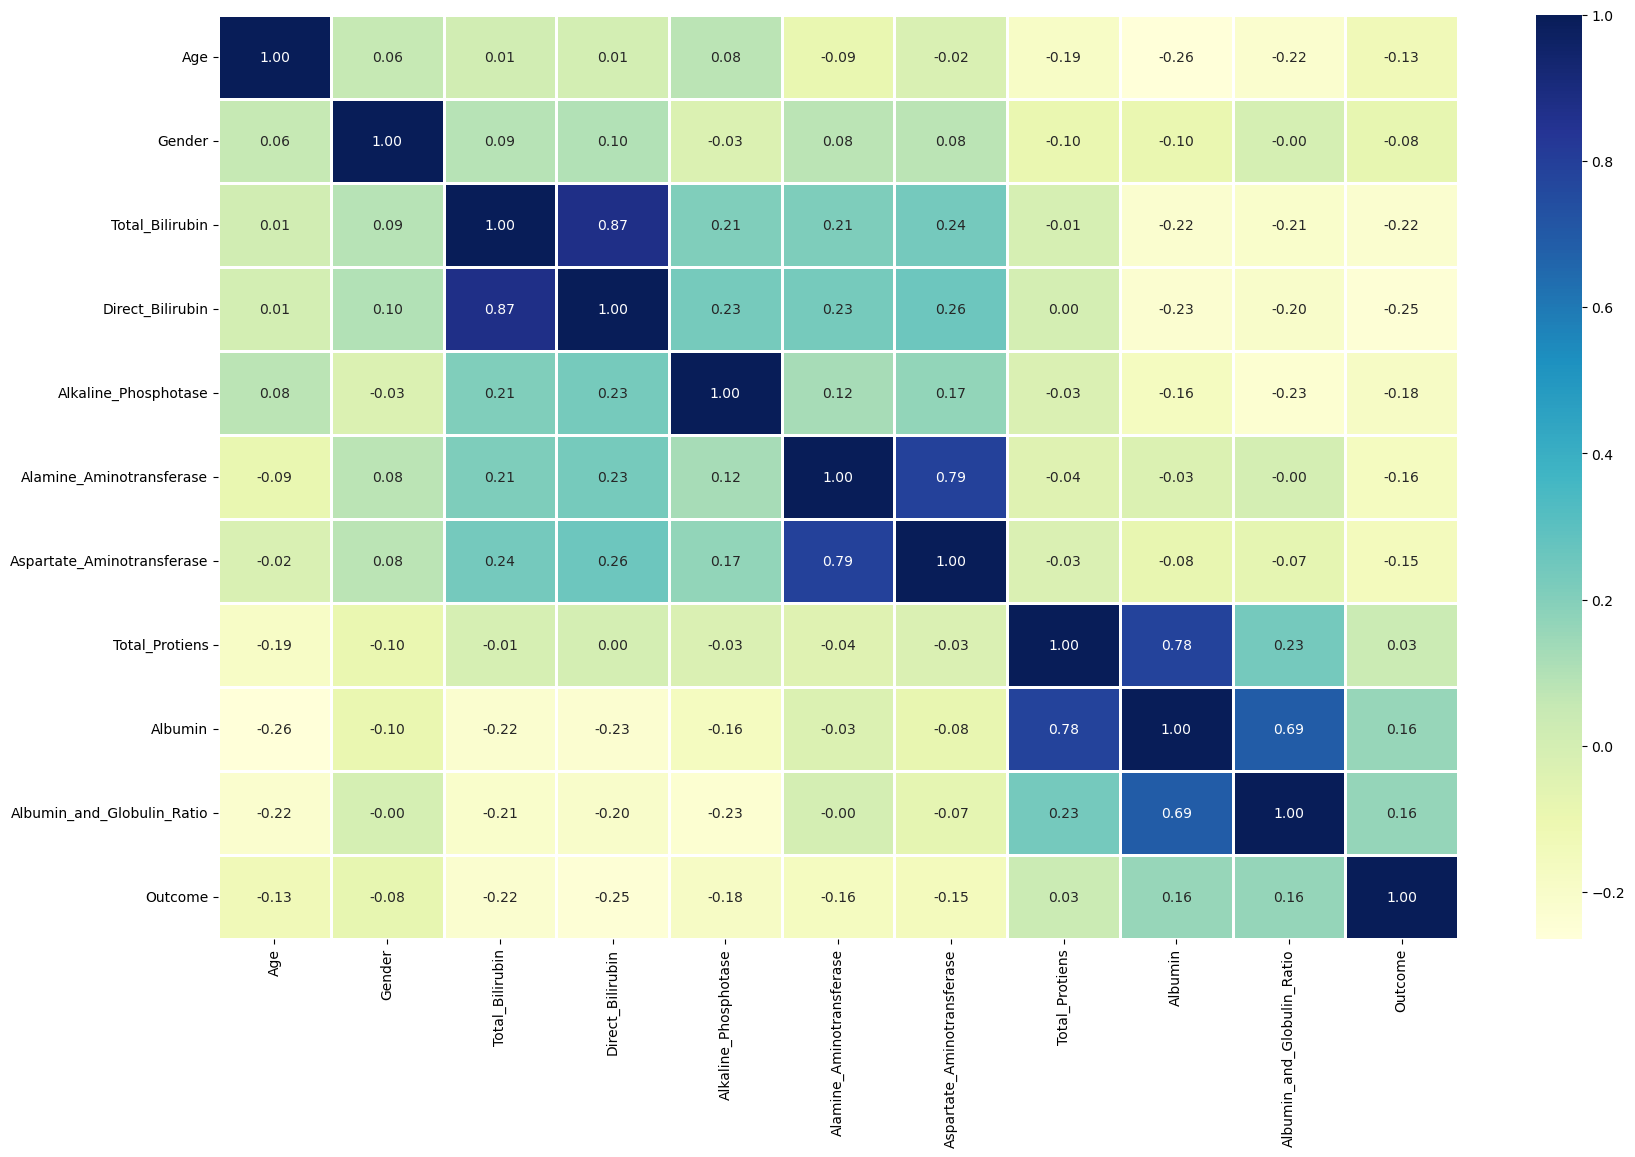

In [14]:
#heatmap
plt.figure(figsize=(20,12))

sns.heatmap(df.corr(), linewidths=1, annot=True,fmt='.2f',cmap="YlGnBu")

plt.show()

In [15]:
print('Total Unhealthy Livers : {}'.format(df.Outcome.value_counts()[1]))
print('Total healthy Livers : {}'.format(df.Outcome.value_counts()[2]))

Total Unhealthy Livers : 414
Total healthy Livers : 165


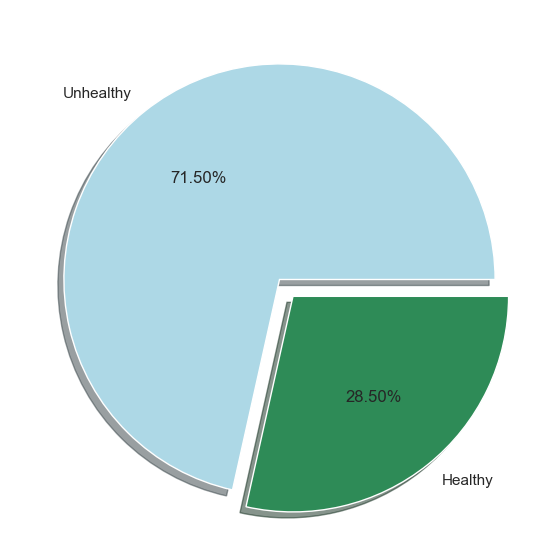

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the Seaborn style
sns.set(style="whitegrid")  # Or you can use 'darkgrid', 'ticks', etc.

# Now your Matplotlib plot will follow Seaborn's style
fig, ax = plt.subplots(figsize=(7, 7))

# Create pie chart
plt.pie(x=df["Outcome"].value_counts(),
        colors=['lightblue', 'seagreen'],
        labels=['Unhealthy', 'Healthy'],
        shadow=True,
        autopct="%1.2f%%",
        explode=(0, 0.1))

plt.show()


In [17]:
df.Gender.value_counts() # feamle =0,  male=1

Gender
1    439
0    140
Name: count, dtype: int64

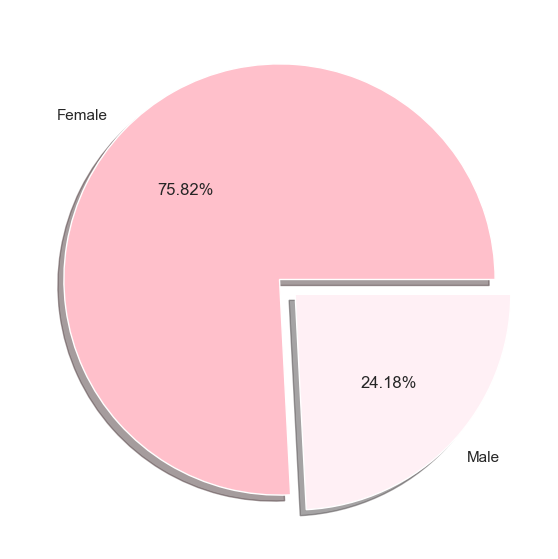

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="whitegrid")  # You can also try 'darkgrid', 'ticks', etc.

# Create pie chart
fig, ax = plt.subplots(figsize=(7, 7))
plt.pie(x=df["Gender"].value_counts(),
        colors=['pink', 'lavenderblush'],
        labels=['Female', 'Male'],
        shadow=True,
        autopct="%1.2f%%",
        explode=(0, 0.1))

plt.show()


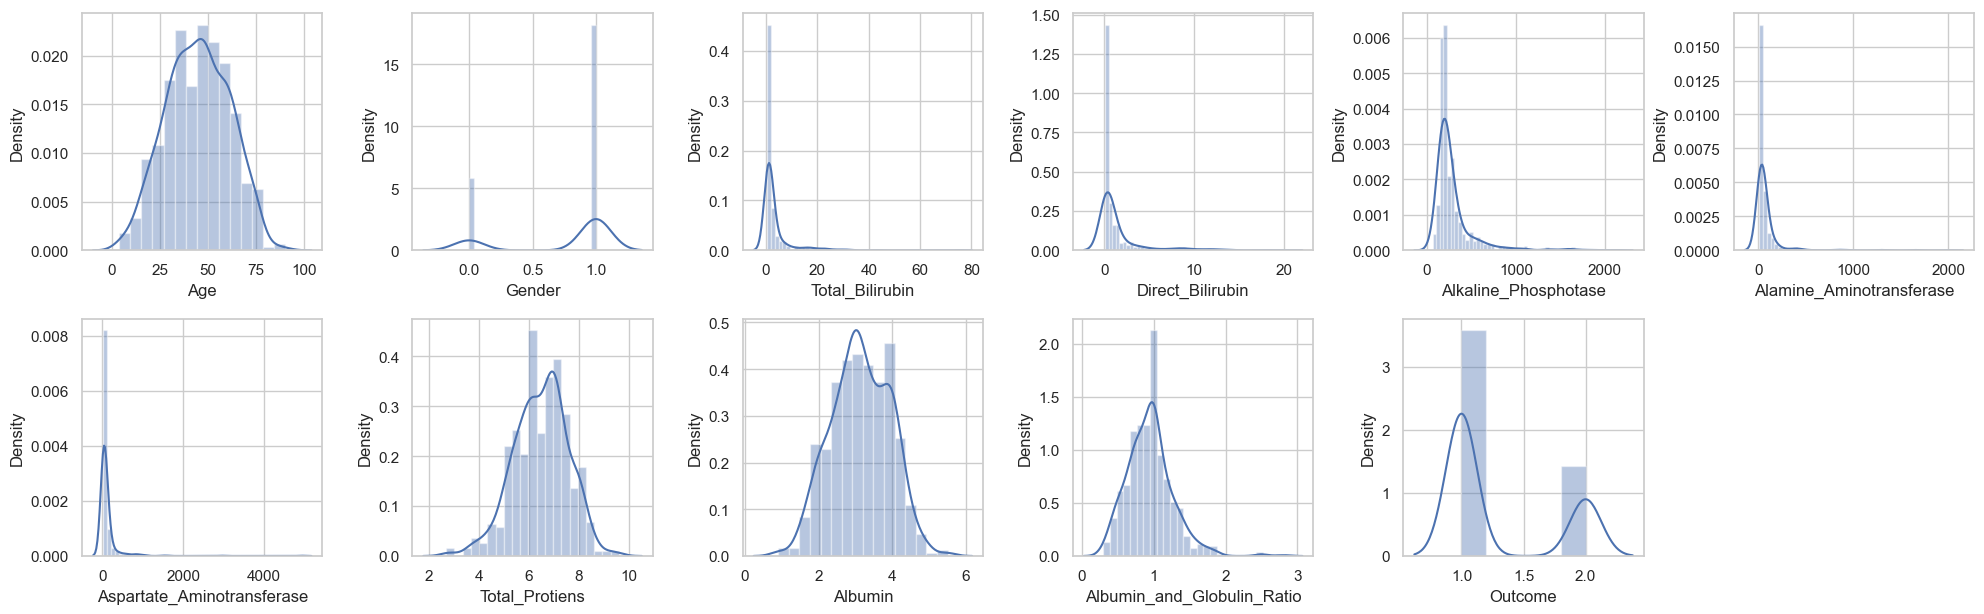

In [19]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in df:
    if plotnumber<=11:
        ax= plt.subplot(5,6, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber+=1

plt.tight_layout()
plt.show()

## Buliding Model

In [20]:
x=df.drop('Outcome', axis=1)
y=df['Outcome']

In [21]:
!pip install scikit-learn==1.6.1 --quiet
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
len(x_train),len(x_test)

(463, 116)

In [23]:
!pip install scikit-learn==1.6.1 --quiet
# scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [24]:
x_train.shape

(463, 10)

# Apply Machine Learning algo.

## Logistic Regression

In [25]:
!pip install scikit-learn==1.6.1 --quiet
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [26]:
y_pred = log_reg.predict(x_test)

In [27]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [28]:
!pip install scikit-learn==1.6.1 --quiet
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_train,log_reg.predict(x_train)))

log_reg_acc= accuracy_score(y_test, log_reg.predict(x_test))
print(log_reg_acc)

y_pred= log_reg.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7537796976241901
0.6551724137931034
[[72  1]
 [39  4]]
              precision    recall  f1-score   support

           1       0.65      0.99      0.78        73
           2       0.80      0.09      0.17        43

    accuracy                           0.66       116
   macro avg       0.72      0.54      0.47       116
weighted avg       0.70      0.66      0.55       116



## K Neighbors Classifier (KNN)

In [29]:
!pip install scikit-learn==1.6.1 --quiet
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [30]:
y_pred= knn.predict(x_test)

In [31]:
y_pred

array([1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2,
       2, 2, 1, 1, 1, 1], dtype=int64)

In [32]:
!pip install scikit-learn==1.6.1 --quiet
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train,knn.predict(x_train)))

knn_acc= accuracy_score(y_test, knn.predict(x_test))
print(knn_acc)

y_pred= knn.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


0.7883369330453563
0.6120689655172413
[[57 16]
 [29 14]]
              precision    recall  f1-score   support

           1       0.66      0.78      0.72        73
           2       0.47      0.33      0.38        43

    accuracy                           0.61       116
   macro avg       0.56      0.55      0.55       116
weighted avg       0.59      0.61      0.59       116



## Decision Tree 

In [33]:
!pip install scikit-learn==1.6.1 --quiet
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [34]:
!pip install scikit-learn==1.6.1 --quiet
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

# accuracy score
print(accuracy_score(y_train,dtc.predict(x_train)))

dtc_acc= accuracy_score(y_test, dtc.predict(x_test))
print(dtc_acc)

#confusion matrix
y_pred= dtc.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
0.5775862068965517
[[54 19]
 [30 13]]
              precision    recall  f1-score   support

           1       0.64      0.74      0.69        73
           2       0.41      0.30      0.35        43

    accuracy                           0.58       116
   macro avg       0.52      0.52      0.52       116
weighted avg       0.56      0.58      0.56       116



## Random Forest Classifier 

In [35]:
!pip install scikit-learn==1.6.1 --quiet
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(
    criterion='entropy', 
    max_depth=11, 
    max_features='sqrt',  # FIXED: 'auto' is deprecated
    min_samples_leaf=2, 
    min_samples_split=3, 
    n_estimators=130,
    random_state=42  # Ensures reproducibility
)

rand_clf.fit(x_train, y_train) 


RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=130, random_state=42)

In [36]:
y_pred=rand_clf.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 2, 1], dtype=int64)

In [37]:
!pip install scikit-learn==1.6.1 --quiet
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

# accuracy score
print(accuracy_score(y_train,rand_clf.predict(x_train)))

rand_clf_acc= accuracy_score(y_test, rand_clf.predict(x_test))
print(rand_clf_acc)

#confusion matrix
y_pred= rand_clf.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9719222462203023
0.6293103448275862
[[66  7]
 [36  7]]
              precision    recall  f1-score   support

           1       0.65      0.90      0.75        73
           2       0.50      0.16      0.25        43

    accuracy                           0.63       116
   macro avg       0.57      0.53      0.50       116
weighted avg       0.59      0.63      0.57       116



## Gradient Boosting Classifier 

In [38]:
!pip install scikit-learn==1.6.1 --quiet
from sklearn.ensemble import GradientBoostingClassifier

gbc= GradientBoostingClassifier()

gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [39]:
gbc= GradientBoostingClassifier(learning_rate= 1, loss= 'exponential', n_estimators= 200)
gbc.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=1, loss='exponential',
                           n_estimators=200)

In [40]:
y_pred= gbc.predict(x_test)

In [41]:
y_pred

array([1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 2, 1, 1, 2, 1], dtype=int64)

In [42]:
!pip install scikit-learn==1.6.1 --quiet
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

# accuracy score
print(accuracy_score(y_train,gbc.predict(x_train)))

gbc_acc= accuracy_score(y_test, gbc.predict(x_test))
print(gbc_acc)

#confusion matrix
y_pred= gbc.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
0.6810344827586207
[[64  9]
 [28 15]]
              precision    recall  f1-score   support

           1       0.70      0.88      0.78        73
           2       0.62      0.35      0.45        43

    accuracy                           0.68       116
   macro avg       0.66      0.61      0.61       116
weighted avg       0.67      0.68      0.65       116



## Stochastic Gradient Boosting(SGB) 

In [43]:
sgbc = GradientBoostingClassifier( max_depth=4, subsample=0.9,max_features=0.75 , n_estimators=200, random_state=0)
sgbc.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=4, max_features=0.75, n_estimators=200,
                           random_state=0, subsample=0.9)

In [44]:
y_pred= sgbc.predict(x_test)

In [45]:
y_pred

array([1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2,
       1, 2, 1, 1, 2, 1], dtype=int64)

In [46]:
!pip install scikit-learn==1.6.1 --quiet
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

# accuracy score
print(accuracy_score(y_train,sgbc.predict(x_train)))

sgbc_acc= accuracy_score(y_test, sgbc.predict(x_test))
print(sgbc_acc)

#confusion matrix
y_pred= sgbc.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
0.6982758620689655
[[64  9]
 [26 17]]
              precision    recall  f1-score   support

           1       0.71      0.88      0.79        73
           2       0.65      0.40      0.49        43

    accuracy                           0.70       116
   macro avg       0.68      0.64      0.64       116
weighted avg       0.69      0.70      0.68       116



In [47]:
models= pd.DataFrame({
    'Model':['Logistic Regresion','KNN','Decision Tree Classifer','Random Forest Classifier',' Gradient Boosting Classifier '],
    'Score': [log_reg_acc, knn_acc , dtc_acc, rand_clf_acc,gbc_acc]
})

models.sort_values(by= "Score", ascending=False)

,Model,Score
4,Gradient Boosting Classifier,0.681034
0,Logistic Regresion,0.655172
3,Random Forest Classifier,0.629310
1,KNN,0.612069
2,Decision Tree Classifer,0.577586


### Best model for liver disease prediction is "Logistic Regresion" both with  accuracy of 65.5%

In [48]:
#saving the train model
import joblib
joblib.dump(log_reg, open('C:/Users/rohit/OneDrive/Desktop/project/models/Liver_disease.pkl', 'wb'))
